# Application of Deep Learning to Predict Persistence, Bioaccumulation and Toxicity of Pharmaceuticals

This notebook illustates the section Applicability Domain Analysis in the paper "Application of Deep Learning to Predict Persistence, Bioaccumulation and Toxicity of Pharmaceuticals". It describes t-Distributed Stochastic Neighbour Embedding (t-SNE) plots in Figure 2 of the main paper and the Applicability Domain (AD)of the Dl-model.
## Environment Setup

To execute this notebook, use the main conda environment (created using environment_main.yaml). If running in terminal activate using:

```bash
conda activate main_DE
```

In [1]:
import pandas as pd
from descriptastorus.descriptors.DescriptorGenerator import MakeGenerator
from rdkit import Chem
import numpy as np

In the following section we will examine the distribution of the compounds in our compiled dataset (labelled as PBT and non-PBT) in a chemical space described by 200 RDKit molecular features and investigated its applicability domain using t-Distributed Stochastic Neighbor Embedding (t-SNE) plots (Figure 2 in the main paper).

### **Figure 2: tSNE plots comparing Molecular features** 

t-SNE plots representing high-dimensional molecular data in two dimensions with 200  RDKit molecular features mapping: A) the compiled dataset, with PBT (orange) and non-PBT (green) chemicals highlighted in different colors, B) overlap between the compiled (gray) and Agrochemicals(yellow) datasets, and C) overlap between the compiled dataset (gray) and  DrugBank data (pink) in the defined chemical space.

### **Our compiled dataset**

In [2]:
startPBT_correct = pd.read_csv('Datasets/5130compounds_PBT.csv')
startPBT_correct.columns = ['SMILES', 'PBT_label']
startPBT_correct

,SMILES,PBT_label
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,1
1,C=C(F)C(=O)OC,0
2,Cc1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,1
3,Clc1ccc2c(Cl)ccnc2c1,0
4,S=c1[nH]c2ccccc2s1,0
...,...,...
5125,CN(C)CCCN(C)C,0
5126,C[N+](C)(C)C1CCCCC1,0
5127,c1ccc(N(CC2CO2)CC2CO2)cc1,0
5128,CCCCCCCCCCCC(=O)N(CCO)CCO,0


In [3]:
counts = startPBT_correct['PBT_label'].value_counts()
counts

1    2710
0    2420
Name: PBT_label, dtype: int64

### **Agrochemicals** 

In [4]:
agrochemicals = pd.read_csv('Datasets/agrochemicals_sanitized.csv')
agrochemicals

,Name,standardized_smiles
0,(4-chlorophenoxy)acetic acid,O=C(O)COc1ccc(Cl)cc1
1,"1-(4-chloro-1,3-dihydro-1,3-dioxo-2H-isoindole...",NC(=O)C1(N2C(=O)c3cccc(Cl)c3C2=O)CCCCC1
2,"1-(4-chlorophenyl)-3-(2,6-dichlorobenzoyl)urea",O=C(NC(=O)c1c(Cl)cccc1Cl)Nc1ccc(Cl)cc1
3,"1,1,1,2-tetrachloroethane",ClCC(Cl)(Cl)Cl
4,"1,1,1-trichloroethane",CC(Cl)(Cl)Cl
...,...,...
1272,Xylachlor,Cc1cccc(N(C(=O)CCl)C(C)C)c1C
1273,Xylylcarb,CNC(=O)Oc1ccc(C)c(C)c1
1274,Zarilamid,CCOC(C#N)NC(=O)c1ccc(Cl)cc1
1275,Zinc phosphide,P=[Zn]


### **DrugBank**

In [5]:
DrugBank_data = pd.read_csv('Datasets/drugs_DrugBank_sanitized.csv')
DrugBank_data

,GENERIC_NAME,standardized_smiles
0,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...
1,Leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=N)N)NC(=...
2,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
3,Gramicidin D,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...
4,Desmopressin,N=C(N)NCCC[C@@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]...
...,...,...
11163,Alogabat,Cc1ccc(-c2noc(C)c2COc2ccc(C(=O)NC3CCOCC3)nn2)cn1
11164,Ropsacitinib,Cn1cc(-c2cn3nccc3c(-c3cnn([C@]4(CC#N)C[C@@H](C...
11165,taletrectinib,C[C@@H](N)COc1ccc(-c2cnc3ccc(N[C@H](C)c4cccc(F...
11166,Tolebrutinib,C=CC(=O)N1CCC[C@@H](n2c(=O)n(-c3ccc(Oc4ccccc4)...


The following steps explore the chemical space of three distinct molecular datasets using **200 RDKit descriptors** and dimensionality reduction techniques:

1. **Generated 200 RDKit molecular descriptors** using RDKit for:
   - **PBT dataset** (PBT and non-PBT molecules)
   - **Agrochemicals**
   - **DrugBank**
   
2. **Standardized features** using MinMaxScaler

3. Created **t-SNE visualizations** showing:
   - Distribution of **PBT** vs **non-PBT** molecules in chemical space
   - Overlap between our compiled dataset (**gray**) and Agrochemicals (**yellow**)
   - Overlap between our compiled dataset (**gray**) and DrugBank data (**pink**)

In [6]:
# Initialize descriptor generator
generator = MakeGenerator(("RDKit2D",))

# Get descriptor names (skipping 'smiles' column)
descriptor_names = [name for name, _ in generator.GetColumns()[1:]]

# Compute descriptors
descriptors_list = []
for smiles in startPBT_correct['SMILES']:  # Make sure 'SMILES' matches your column name
    try:
        results = generator.process(smiles)
        if results is None:
            descriptors_list.append([np.nan] * len(descriptor_names))
        else:
            descriptors_list.append(results[1:])
    except:
        descriptors_list.append([np.nan] * len(descriptor_names))

# Create DataFrame with descriptors and combine with original data
descriptors_startPBT = pd.DataFrame(descriptors_list, columns=descriptor_names)
final_df = pd.concat([startPBT_correct, descriptors_startPBT], axis=1)

# Save results
#final_df.to_csv('train_with_descriptors.csv', index=False)

# Print shape to verify
print("Dataset shape:", final_df.shape)
print("Number of descriptors added:", len(descriptor_names))

Dataset shape: (5130, 202)
Number of descriptors added: 200


In [7]:
descriptors_startPBT

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,5.663275,245.954159,20.435029,20.136170,25.844374,13.071068,12.772209,27.211503,9.089408,35.648200,...,0,0,0,0,0,0,0,0,0,0.127319
1,3.577920,97.862917,5.861807,3.901568,3.901568,3.180739,1.609032,1.609032,0.896480,0.896480,...,0,0,0,0,0,0,0,0,0,0.360214
2,3.603567,226.061515,9.464102,5.889822,9.669467,5.464102,2.944911,4.834734,2.194911,4.084734,...,0,0,0,0,0,0,0,0,0,0.442557
3,2.863026,425.798091,8.552042,6.089894,7.601752,5.770857,3.469813,4.225741,2.454246,3.297882,...,0,0,0,0,0,0,0,0,0,0.630265
4,3.007620,362.898353,6.974691,5.125898,6.758891,4.860173,2.939723,4.164468,2.010679,3.729544,...,0,0,0,0,1,0,0,0,0,0.596343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5125,2.914659,51.936491,7.276021,7.015748,7.015748,4.125898,3.421310,3.421310,2.960105,2.960105,...,0,0,0,0,0,0,0,0,0,0.546557
5126,2.389214,95.786119,7.612884,7.560098,7.560098,4.605172,4.416336,4.416336,4.408071,4.408071,...,0,0,0,0,0,0,0,0,0,0.491359
5127,1.689173,305.653821,10.087576,8.633589,8.633589,7.415816,5.448494,5.448494,4.151216,4.151216,...,0,0,0,0,0,0,0,0,0,0.678032
5128,3.454348,215.767524,15.054195,13.149384,13.149384,9.756749,8.253302,8.253302,5.406427,5.406427,...,0,0,0,0,0,0,0,7,0,0.482917


### Compute 200 RDKit descriptors for Agrochemicals

In [8]:
# Compute descriptors
descriptors_list = []
for smiles in agrochemicals['standardized_smiles']:  # Make sure 'SMILES' matches your column name
    try:
        results = generator.process(smiles)
        if results is None:
            descriptors_list.append([np.nan] * len(descriptor_names))
        else:
            descriptors_list.append(results[1:])
    except:
        descriptors_list.append([np.nan] * len(descriptor_names))

# Create DataFrame with descriptors and combine with original data
descriptors_agro = pd.DataFrame(descriptors_list, columns=descriptor_names)
agro_desc = pd.concat([agrochemicals, descriptors_agro], axis=1)

In [9]:
descriptors_agro

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,2.529889,268.136391,8.974691,6.158183,6.914111,5.681541,3.284433,3.662398,2.136334,2.572770,...,0,0,0,0,0,0,0,0,0,0.783250
1,2.119213,650.318857,15.198306,11.394858,12.150787,9.987705,6.961974,7.339938,5.564607,5.971807,...,0,0,0,0,0,0,0,0,0,0.849851
2,2.055651,666.868517,15.405413,10.491842,12.759629,9.969234,5.790579,6.924473,4.011800,5.262636,...,0,0,0,0,0,0,0,0,1,0.836359
3,3.168490,35.302969,5.207107,2.718965,5.742680,2.560660,1.187761,2.856177,0.748808,3.532139,...,0,0,0,0,0,0,0,0,0,0.487138
4,3.023716,20.364528,4.500000,2.633893,4.901680,2.000000,1.066947,2.200840,0.781232,3.629412,...,0,0,0,0,0,0,0,0,0,0.445171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,3.212176,387.519026,12.292529,10.249934,11.005863,7.485270,5.429069,5.963591,4.210156,4.477417,...,0,0,0,0,0,0,0,0,0,0.741686
1273,2.793568,320.700826,9.844935,8.048547,8.048547,6.130229,4.100406,4.100406,2.885585,2.885585,...,0,0,0,0,0,0,0,0,0,0.715837
1274,2.648301,397.440744,11.966255,8.735533,9.491462,7.668234,4.746915,5.124879,2.944836,3.381272,...,0,0,0,0,0,0,0,0,0,0.815973
1275,2.000000,2.000000,2.000000,1.207107,5.174235,1.000000,0.353553,5.511352,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.306547


### Compute 200 RDKit descriptors for DrugBank

In [10]:
# Compute descriptors
descriptors_list = []
for smiles in DrugBank_data['standardized_smiles']:  # Make sure 'SMILES' matches your column name
    try:
        results = generator.process(smiles)
        if results is None:
            descriptors_list.append([np.nan] * len(descriptor_names))
        else:
            descriptors_list.append(results[1:])
    except:
        descriptors_list.append([np.nan] * len(descriptor_names))

# Create DataFrame with descriptors and combine with original data
descriptors_drugs = pd.DataFrame(descriptors_list, columns=descriptor_names)
drugs_desc = pd.concat([DrugBank_data, descriptors_drugs], axis=1)

In [11]:
descriptors_drugs

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,1.052628,5529.131046,114.992591,85.843918,85.843918,73.303583,50.201079,50.201079,37.741088,37.741088,...,0,0,0,0,0,0,0,1,0,0.014176
1,1.220376,3042.087970,63.320322,49.756995,49.756995,41.525426,29.527720,29.527720,22.794444,22.794444,...,0,0,0,0,0,0,0,1,0,0.015472
2,1.242726,3235.805624,66.527429,51.390949,51.390949,43.171873,29.860583,29.860583,23.654632,23.654632,...,0,0,0,0,0,0,0,1,1,0.010267
3,1.018536,5273.870158,96.197908,78.097824,78.097824,62.140303,45.344840,45.344840,36.980750,36.980750,...,0,0,0,0,0,0,0,0,0,0.022619
4,1.680526,2366.439296,54.320687,40.355262,41.988255,35.195396,23.586716,26.074750,17.374638,20.001838,...,0,0,0,0,0,0,0,1,0,0.027501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11163,1.391628,995.241125,20.924074,16.921483,16.921483,14.597357,9.832366,9.832366,7.159770,7.159770,...,0,0,0,0,0,0,0,0,0,0.661156
11164,1.593054,1287.443914,20.009861,15.765045,15.765045,14.114453,9.272817,9.272817,7.505531,7.505531,...,0,0,0,0,0,0,0,0,0,0.534950
11165,1.568146,1140.014676,21.087211,16.917864,16.917864,14.491204,9.850133,9.850133,7.365712,7.365712,...,0,0,0,0,0,0,0,0,0,0.475478
11166,1.559601,1406.402820,23.656125,18.632037,18.632037,16.562882,11.186752,11.186752,8.245357,8.245357,...,0,0,0,0,0,0,0,0,0,0.460529


In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
# Check for NaN, inf, or -inf in the DataFrame
print("Checking for invalid values...")
print("NaN values:", descriptors_startPBT.isna().sum().sum())
print("Infinity values:", np.isinf(descriptors_startPBT).sum().sum())

# Replace invalid values with a suitable substitute (e.g., 0 or column mean)
descriptors_startPBT.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf/-inf with NaN
descriptors_startPBT.fillna(0, inplace=True)  # Replace NaN with 0, or use df_descriptors_PBT.fillna(df_descriptors_PBT.mean(), inplace=True)

# Scale the DataFrame using MinMaxScaler
scaler = MinMaxScaler()
descriptors_PBT_scaled = pd.DataFrame(scaler.fit_transform(descriptors_startPBT), columns=descriptors_startPBT.columns)

# Verify scaling output
descriptors_PBT_scaled

Checking for invalid values...
NaN values: 204
Infinity values: 14


,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,0.660544,0.053938,0.237047,0.347215,0.447416,0.284464,0.365607,0.726648,0.281398,0.762871,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.114176
1,0.374653,0.021462,0.049657,0.057048,0.053926,0.051391,0.042949,0.037905,0.027754,0.019185,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.367868
2,0.378169,0.049576,0.095977,0.092585,0.157359,0.105200,0.081561,0.124681,0.067952,0.087413,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.457564
3,0.276644,0.093379,0.084250,0.096161,0.120279,0.112429,0.096733,0.108298,0.075981,0.070575,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.662034
4,0.296467,0.079585,0.063967,0.078931,0.105165,0.090968,0.081411,0.106650,0.062248,0.079812,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000,0.0,0.625083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5125,0.283723,0.011390,0.067842,0.112709,0.109771,0.073664,0.095331,0.086658,0.091642,0.063346,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.570851
5126,0.211687,0.021006,0.072173,0.122439,0.119533,0.084959,0.124091,0.113425,0.136469,0.094333,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.510724
5127,0.115715,0.067031,0.103994,0.141626,0.138783,0.151194,0.153924,0.141192,0.128517,0.088836,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.714067
5128,0.357712,0.047318,0.167858,0.222338,0.219763,0.206360,0.234994,0.216645,0.167377,0.115697,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.125,0.0,0.501527


In [14]:
from sklearn.manifold import TSNE

In [15]:
# Create a t-SNE instance with the desired number of components and perplexity value
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit and transform the dataset
X_tsne = tsne.fit_transform(descriptors_PBT_scaled)

/common/users/devan/anaconda3/envs/main_DE/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/common/users/devan/anaconda3/envs/main_DE/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [16]:
import matplotlib.pyplot as plt

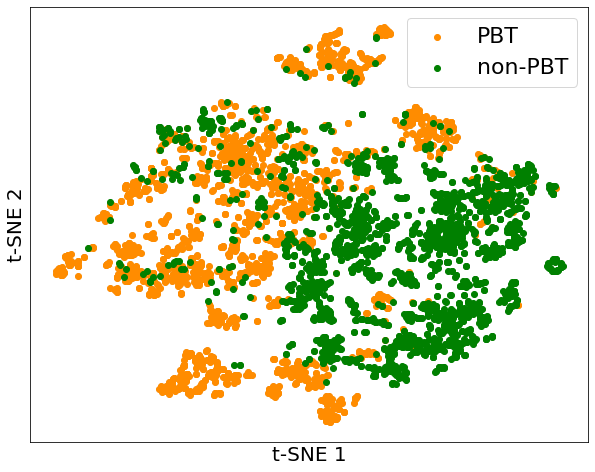

In [17]:
plt.figure(figsize=(10, 8))

# Scatter plots for the t-SNE data
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='grey', alpha=0.2)
plt.scatter(X_tsne[np.where(np.array(startPBT_correct["PBT_label"]) == 1), 0], 
            X_tsne[np.where(np.array(startPBT_correct["PBT_label"]) == 1), 1], 
            c='darkorange', label='PBT')
plt.scatter(X_tsne[np.where(np.array(startPBT_correct["PBT_label"]) == 0), 0], 
            X_tsne[np.where(np.array(startPBT_correct["PBT_label"]) == 0), 1], 
            c='green', label='non-PBT')

# Labels for the axes
plt.xlabel('t-SNE 1', fontsize=20)
plt.ylabel('t-SNE 2', fontsize=20)

# Remove the axis ticks
plt.xticks([])
plt.yticks([])

# Move the legend to the right
plt.legend(fontsize=22, loc='upper right')

plt.savefig('images/tsne_A_200rdkit.png', dpi=600, bbox_inches='tight')

plt.show()

In [18]:
# Check for NaN, inf, or -inf in the DataFrame
print("Checking for invalid values...")
print("NaN values:", descriptors_agro.isna().sum().sum())
print("Infinity values:", np.isinf(descriptors_agro).sum().sum())

# Replace invalid values with a suitable substitute (e.g., 0 or column mean)
descriptors_agro.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf/-inf with NaN
descriptors_agro.fillna(0, inplace=True)  # Replace NaN with 0, or use df_descriptors_PBT.fillna(df_descriptors_PBT.mean(), inplace=True)

Checking for invalid values...
NaN values: 100
Infinity values: 0


In [19]:
# Check for NaN, inf, or -inf in the DataFrame
print("Checking for invalid values...")
print("NaN values:", descriptors_drugs.isna().sum().sum())
print("Infinity values:", np.isinf(descriptors_drugs).sum().sum())

# Replace invalid values with a suitable substitute (e.g., 0 or column mean)
descriptors_drugs.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf/-inf with NaN
descriptors_drugs.fillna(0, inplace=True)  # Replace NaN with 0, or use df_descriptors_PBT.fillna(df_descriptors_PBT.mean(), inplace=True)

Checking for invalid values...
NaN values: 572
Infinity values: 8


In [20]:
descriptors_tot =pd.concat((descriptors_startPBT, descriptors_agro, descriptors_drugs))

In [21]:
descriptors_tot_scaled=pd.DataFrame(MinMaxScaler().fit_transform(descriptors_tot), columns=descriptors_tot.columns)

In [22]:
descriptors_tot_scaled

,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,0.695790,0.014810,0.092047,0.120080,0.144609,0.093331,0.132541,0.212949,0.125530,0.318002,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.131752
1,0.439584,0.005893,0.026404,0.023267,0.021831,0.022711,0.016697,0.012592,0.012381,0.007997,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.379194
2,0.442735,0.013612,0.042630,0.035123,0.054104,0.039015,0.030560,0.037835,0.030313,0.036438,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.466679
3,0.351752,0.025640,0.038522,0.036316,0.042535,0.041205,0.036007,0.033069,0.033894,0.029419,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.666112
4,0.369516,0.021852,0.031417,0.030568,0.037819,0.034703,0.030506,0.032590,0.027769,0.033270,...,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.630070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17570,0.170976,0.059929,0.094250,0.100910,0.094682,0.104229,0.102033,0.076945,0.098880,0.063869,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.698931
17571,0.195723,0.077524,0.090132,0.094013,0.088212,0.100781,0.096226,0.072566,0.103656,0.066954,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.564843
17572,0.192663,0.068647,0.094985,0.100888,0.094662,0.103471,0.102217,0.077084,0.101725,0.065706,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.501656
17573,0.191613,0.084687,0.106556,0.111110,0.104253,0.118263,0.116088,0.087544,0.113873,0.073553,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.485774


In [23]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit and transform the dataset
X_tsne = tsne.fit_transform(descriptors_tot_scaled)

/common/users/devan/anaconda3/envs/main_DE/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/common/users/devan/anaconda3/envs/main_DE/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


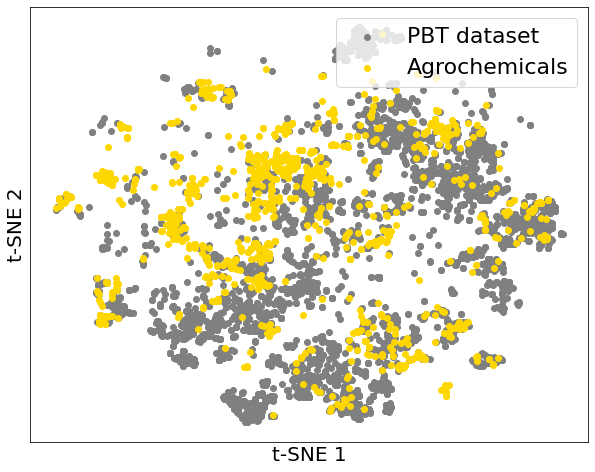

In [24]:
# Plot the t-SNE points
plt.figure(figsize=(10, 8))

plt.scatter(X_tsne[:5130,0], X_tsne[:5130,1], label='PBT dataset', c = 'grey')
plt.scatter(X_tsne[5131:6408, 0], X_tsne[5131:6408, 1], label='Agrochemicals', c='gold')

plt.xlabel('t-SNE 1', fontsize = 20)
plt.ylabel('t-SNE 2', fontsize = 20)

# Remove the axis ticks
plt.xticks([])
plt.yticks([])

# Move the legend to the right
plt.legend(fontsize=22, loc='upper right')

plt.savefig('images/tsne_B_200rdkit.png', dpi=600, bbox_inches='tight')
plt.show()

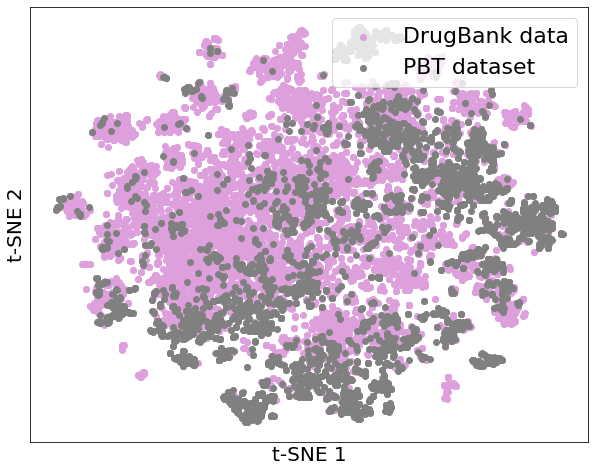

In [25]:
# Plot the t-SNE points
plt.figure(figsize=(10, 8))

plt.scatter(X_tsne[6408:, 0], X_tsne[6408:, 1], label='DrugBank data', c='plum')
plt.scatter(X_tsne[:5130,0], X_tsne[:5130,1], label='PBT dataset', c = 'grey')

plt.xlabel('t-SNE 1', fontsize = 20)
plt.ylabel('t-SNE 2', fontsize = 20)

# Remove the axis ticks
plt.xticks([])
plt.yticks([])

# Move the legend to the right
plt.legend(fontsize=22, loc='upper right')
plt.savefig('images/tsne_C_200rdkit.png', dpi=600, bbox_inches='tight')
plt.show()

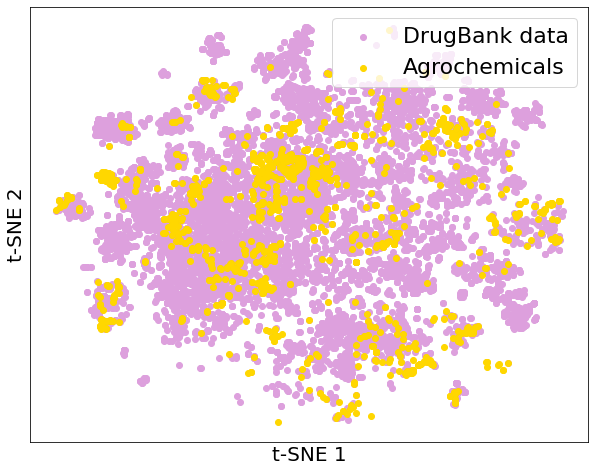

In [26]:
# Plot the t-SNE points
plt.figure(figsize=(10, 8))

plt.scatter(X_tsne[6408:, 0], X_tsne[6408:, 1], label='DrugBank data', c='plum')
plt.scatter(X_tsne[5131:6408, 0], X_tsne[5131:6408, 1], label='Agrochemicals', c='gold')

plt.xlabel('t-SNE 1', fontsize = 20)
plt.ylabel('t-SNE 2', fontsize = 20)

# Remove the axis ticks
plt.xticks([])
plt.yticks([])

# Move the legend to the right
plt.legend(fontsize=22, loc='upper right')
plt.savefig('images/tsne_S1_200rdkit.png', dpi=600, bbox_inches='tight')
plt.show()

### **Applicability Domain Analysis for Chemical Compounds**

The following section implements an applicability domain (AD) analysis for chemical compounds using two different approaches:
1. **Morgan fingerprints-based analysis**
2. **RDKit molecular descriptors-based analysis**

The analysis helps determine whether new compounds (test set and drugs set) fall within the chemical space of our training set.

In [27]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, BondType, rdmolops
from rdkit.Chem import Descriptors, Fragments, rdMolDescriptors, rdchem, PandasTools, EState
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from descriptastorus.descriptors.DescriptorGenerator import MakeGenerator
from rdkit import DataStructs

#### **Morgan Fingerprints Functions**

These functions handle the generation and processing of Morgan fingerprints:
- `compute_morgan_fingerprints`: Generates Morgan fingerprints for a list of SMILES with specified radius and bit length
- `convert_fingerprints_to_numpy`: Converts RDKit fingerprints to numpy arrays for further processing

In [28]:
def compute_morgan_fingerprints(smiles_list, radius=2, nBits=2048):
    """Generate Morgan fingerprints for a list of SMILES."""
    fps = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
            fps.append(fp)
    return fps

def convert_fingerprints_to_numpy(fps):
    """Convert RDKit fingerprints to numpy array."""
    num_fps = len(fps)
    fp_length = len(fps[0])
    np_fps = np.zeros((num_fps, fp_length), dtype=np.int8)
    
    for i, fp in enumerate(fps):
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, arr)
        np_fps[i] = arr
    
    return np_fps

#### **RDKit Descriptors Functions**

These functions handle the computation and preprocessing of RDKit molecular descriptors:
- `compute_rdkit_descriptors`: Calculates 2D RDKit descriptors for input molecules
- `preprocess_descriptors`: Handles data preprocessing including:
  - Missing value imputation
  - Handling infinite values
  - Feature scaling using MinMaxScaler

In [29]:
def compute_rdkit_descriptors(smiles_list):
    """Compute RDKit descriptors for a list of SMILES."""
    generator = MakeGenerator(("RDKit2D",))
    descriptor_names = [name for name, _ in generator.GetColumns()[1:]]
    
    descriptors_list = []
    for smiles in smiles_list:
        descriptors_list.append(generator.process(smiles)[1:])
    
    return pd.DataFrame(descriptors_list, columns=descriptor_names)

def preprocess_descriptors(descriptors_df):
    """Preprocess descriptors by handling missing values and scaling."""
    # Handle missing and infinite values
    descriptors_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    descriptors_df.fillna(0, inplace=True)
    
    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = pd.DataFrame(
        scaler.fit_transform(descriptors_df),
        columns=descriptors_df.columns
    )
    
    return scaled_data

#### **Applicability Domain Analysis**

The `analyze_applicability_domain` function implements a comprehensive AD analysis using:
- Principal Component Analysis (PCA) for dimensionality reduction
- Mahalanobis distance calculation in the PCA space

Key parameters:
- variance_threshold: Determines the explained variance ratio for PCA (default: 90%)
- threshold_percentile: Sets the AD boundary based on training set distances (default: 99th percentile)

The applicability domain (AD) of the model was assessed using two complementary molecular representations: **Morgan fingerprints (radius=2, 2048 bits)** and **RDKit molecular descriptors (200 features)**. Principal Component Analysis (PCA) was employed to reduce dimensionality while retaining 90% of data variance, followed by Mahalanobis distance calculation in the reduced space to determine the AD boundaries. The AD threshold was set at the 99th percentile of training set distances, using the **cluster-centroids dataset (n=584)** as reference. This approach was applied to evaluate both the test set  of **singletons (n=1065)** and **pharmaceutical compounds (n=559).**

In [57]:
from applicability_domain import analyze_applicability_domain

#### **Data Loading and Processing**

Loading three datasets for analysis:
1. Training set: Cluster centroids from PBT dataset
2. Test set: Singleton compounds from PBT dataset
3. Drugs set: Pharmaceutical compounds for external validation

In [58]:
training_data = pd.read_csv("Splitting_strategy_datasets/new_Cluster_centroids_training_PBT.csv")
test_data = pd.read_csv("Splitting_strategy_datasets/new_singletons_test_PBT.csv")
drugs_data = pd.read_csv("Datasets/Pharmaceuticals_559_QSPR_PBT.csv")

#### **Morgan Fingerprints-Based AD Analysis**

Applying the AD analysis using Morgan fingerprints to:
- Compare test set compounds against training set chemical space
- Evaluate pharmaceutical compounds' similarity to training set

In [59]:
print("\nGenerating Morgan fingerprints...")
train_fps = compute_morgan_fingerprints(training_data['standardized_smiles'])
test_fps = compute_morgan_fingerprints(test_data['standardized_smiles'])
drugs_fps = compute_morgan_fingerprints(drugs_data['DB_smiles'])

# Convert to numpy arrays
train_fp_array = convert_fingerprints_to_numpy(train_fps)
test_fp_array = convert_fingerprints_to_numpy(test_fps)
drugs_fp_array = convert_fingerprints_to_numpy(drugs_fps)

print("\nAnalyzing applicability domain with Morgan fingerprints...")
print("\nTest set analysis:")
morgan_test_results = analyze_applicability_domain(train_fp_array, test_fp_array)
print("\nDrugs set analysis:")
morgan_drugs_results = analyze_applicability_domain(train_fp_array, drugs_fp_array)


Generating Morgan fingerprints...

Analyzing applicability domain with Morgan fingerprints...

Test set analysis:

Using 276 components to explain 90.0% of variance

Training distances statistics:
99th percentile threshold: 23.299 (This means 99% of training compounds have distances below this value)
Training set - Min distance: 5.126
Training set - Max distance: 23.856
Training set - Mean distance: 15.957
Training set - Median distance: 15.763

Test set distances statistics:
Test set - Min distance: 3.713
Test set - Max distance: 23.118
Test set - Mean distance: 11.694
Test set - Median distance: 11.646

Compounds above threshold:
Training set: 6 (1.0% of training set)
Test set: 0 (0.0% of test set)

Applicability Domain Analysis Results
--------------------------------------------------
Training set: 6 compounds out of 584 (1.0%) out of domain
Test set: 0 compounds out of 1065 (0.0%) out of domain

Drugs set analysis:

Using 276 components to explain 90.0% of variance

Training dist

#### **RDKit Descriptors-Based AD Analysis**

Performing AD analysis using RDKit molecular descriptors to:
- Evaluate chemical space coverage using physicochemical properties
- Identify compounds outside the applicability domain
- Compare results with fingerprint-based analysis

In [73]:
print("\nComputing RDKit descriptors...")
train_desc = compute_rdkit_descriptors(training_data['standardized_smiles'])
test_desc = compute_rdkit_descriptors(test_data['standardized_smiles'])
drugs_desc = compute_rdkit_descriptors(drugs_data['DB_smiles'])

# Preprocess descriptors
train_desc_scaled = preprocess_descriptors(train_desc)
test_desc_scaled = preprocess_descriptors(test_desc)
drugs_desc_scaled = preprocess_descriptors(drugs_desc)

print("\nAnalyzing applicability domain with RDKit descriptors...")
print("\nTest set analysis:")
rdkit_test_results = analyze_applicability_domain(train_desc_scaled, test_desc_scaled)
print("\nDrugs set analysis:")
rdkit_drugs_results = analyze_applicability_domain(train_desc_scaled, drugs_desc_scaled)


Computing RDKit descriptors...

Analyzing applicability domain with RDKit descriptors...

Test set analysis:

Using 39 components to explain 90.0% of variance

Training distances statistics:
99th percentile threshold: 13.207 (This means 99% of training compounds have distances below this value)
Training set - Min distance: 2.599
Training set - Max distance: 22.633
Training set - Mean distance: 5.815
Training set - Median distance: 5.289

Test set distances statistics:
Test set - Min distance: 2.625
Test set - Max distance: 14.326
Test set - Mean distance: 5.541
Test set - Median distance: 4.995

Compounds above threshold:
Training set: 6 (1.0% of training set)
Test set: 6 (0.6% of test set)

Applicability Domain Analysis Results
--------------------------------------------------
Training set: 6 compounds out of 584 (1.0%) out of domain
Test set: 6 compounds out of 1065 (0.6%) out of domain

Drugs set analysis:

Using 39 components to explain 90.0% of variance

Training distances stati

#### **Save Results**

Saving analysis results to CSV files, including:
- Compounds identified as out-of-domain
- Separate files for test set and drugs set results
- Both Morgan fingerprints and RDKit descriptors analyses

In [74]:
def save_results(train_df, test_df, drugs_df, 
                morgan_test, morgan_drugs,
                rdkit_test, rdkit_drugs):
    """Save analysis results to CSV files."""
    
    # Save Morgan fingerprints results
    # For test set
    out_indices = morgan_test['test_out_indices']
    test_morgan_out = test_df.iloc[out_indices]
    test_morgan_out = test_morgan_out.copy()  # Create a copy to avoid SettingWithCopyWarning
    test_morgan_out.to_csv('Datasets/morgan_test_out_of_domain.csv', index=False)
    
    # For drugs set
    out_indices = morgan_drugs['test_out_indices']
    drugs_morgan_out = drugs_df.iloc[out_indices]
    drugs_morgan_out = drugs_morgan_out.copy()  # Create a copy to avoid SettingWithCopyWarning
    drugs_morgan_out.to_csv('Datasets/morgan_drugs_out_of_domain.csv', index=False)
    
    # Save RDKit descriptors results
    # For test set
    out_indices = rdkit_test['test_out_indices']
    test_rdkit_out = test_df.iloc[out_indices]
    test_rdkit_out = test_rdkit_out.copy()  # Create a copy to avoid SettingWithCopyWarning
    test_rdkit_out.to_csv('Datasets/rdkit_test_out_of_domain.csv', index=False)
    
    # For drugs set
    out_indices = rdkit_drugs['test_out_indices']
    drugs_rdkit_out = drugs_df.iloc[out_indices]
    drugs_rdkit_out = drugs_rdkit_out.copy()  # Create a copy to avoid SettingWithCopyWarning
    drugs_rdkit_out.to_csv('Datasets/rdkit_drugs_out_of_domain.csv', index=False)
    
    # Print summary of saved results
    print("\nResults saved to CSV files:")
    print(f"- morgan_test_out_of_domain.csv ({len(test_morgan_out)} compounds)")
    print(f"- morgan_drugs_out_of_domain.csv ({len(drugs_morgan_out)} compounds)")
    print(f"- rdkit_test_out_of_domain.csv ({len(test_rdkit_out)} compounds)")
    print(f"- rdkit_drugs_out_of_domain.csv ({len(drugs_rdkit_out)} compounds)")

In [75]:
save_results(training_data, test_data, drugs_data,
            morgan_test_results, morgan_drugs_results,
            rdkit_test_results, rdkit_drugs_results)


Results saved to CSV files:
- morgan_test_out_of_domain.csv (0 compounds)
- morgan_drugs_out_of_domain.csv (0 compounds)
- rdkit_test_out_of_domain.csv (6 compounds)
- rdkit_drugs_out_of_domain.csv (12 compounds)


In the following section we will compare the proposed model (***the model trained on cluster centroids***) with the GP-QSPR prediction to the test set of 1059 singletons within our model's applicability domain,  and we will show results as confusion matrices.

### **Figure 4: Confusion Matrix comparing QSAR to Deep Learning**
Comparison of GP-QSPR and DL-based model prediction on a test set of 1059 dissimilar singletons within the applicability domain. The confusion matrices for the GP-QSPR model (A) and DL-based model (B) predictions illustrate the performances by extracting Accuracy  and Recall of each model, respectively. 

In [84]:
out_of_domain_test = pd.read_csv('Datasets/rdkit_test_out_of_domain.csv')
out_of_domain_test

,standardized_smiles,PBT_label
0,Cc1ccc(N2C(=O)N(c3ccc(C)c(NC(=O)Oc4c(C)cc(N=O)...,1
1,CC1(C)CC(OC(=O)N(CCCCCCN(C(=O)OC2CC(C)(C)NC(C)...,1
2,CC1CCCC(=O)N1C(=O)NC1CC(C)(C)CC(C)(CNC(=O)OCCO...,1
3,Nc1cc(S(=O)(=O)O)c(Nc2ccc3c(c2S(=O)(=O)O)Oc2c(...,0
4,Nc1ccc(Nc2ccc3nc4ccc(Nc5ccc6nc7ccc(Nc8ccc9nc%1...,0
5,CCCCCCCCCCCCCCCCCC(=O)OC(COC(=O)CCCCCCCCCCCCCC...,0


In [85]:
singletons = pd.read_csv('Splitting_strategy_datasets/new_singletons_test_PBT.csv')
singletons

,standardized_smiles,PBT_label
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,1
1,C=C(F)C(=O)OC,0
2,S=c1[nH]c2ccccc2s1,0
3,O=S(=O)(O)C(F)(F)F,0
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,1
...,...,...
1060,NCCCN1CCN(CCCN)CC1,0
1061,CC(=O)NNC(C)=O,0
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0
1063,C=CC(=O)NCNC(=O)C=C,0


In [86]:
filtered_singletons = singletons[~singletons['standardized_smiles'].isin(out_of_domain_test['standardized_smiles'])]
filtered_singletons

,standardized_smiles,PBT_label
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,1
1,C=C(F)C(=O)OC,0
2,S=c1[nH]c2ccccc2s1,0
3,O=S(=O)(O)C(F)(F)F,0
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,1
...,...,...
1060,NCCCN1CCN(CCCN)CC1,0
1061,CC(=O)NNC(C)=O,0
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0
1063,C=CC(=O)NCNC(=O)C=C,0


In [87]:
filtered_singletons.to_csv('Datasets/filtered_singletons.csv', index= False)

To run the model predicting using `chemprop` in a Bash environment:

Open a new bash shell and execute the following commands:

1. **Activate the Conda Environment**  
   First, make sure to activate the `chemprop_DE` Conda environment to access the required dependencies:
   
   ```bash
   conda activate chemprop_DE
   ```

2. Run the **Prediction Command**

```bash
chemprop_predict --test_path Datasets/filtered_singletons.csv \
                 --features_generator rdkit_2d_normalized \
                 --no_features_scaling \
                 --checkpoint_dir 0fold_outputs/CC_results_nok/fold_0/ \
                 --preds_path Datasets/filtered_singletons_predictions_1059.csv
```


3. after completing the **Prediction command** in bash returns to this notebook

In [88]:
test_final_pred = pd.read_csv('Datasets/filtered_singletons_predictions_1059.csv')
test_final_pred

,standardized_smiles,PBT_label
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,0.298063
1,C=C(F)C(=O)OC,0.000273
2,S=c1[nH]c2ccccc2s1,0.005313
3,O=S(=O)(O)C(F)(F)F,0.000527
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,0.762580
...,...,...
1054,NCCCN1CCN(CCCN)CC1,0.003541
1055,CC(=O)NNC(C)=O,0.000040
1056,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0.382319
1057,C=CC(=O)NCNC(=O)C=C,0.000039


In [89]:
test_final_pred['PBT_bin_pred'] = (test_final_pred['PBT_label'] > 0.38).astype(int)
test_final_pred.columns = [['SMILES', 'PBT_pred', 'PBT_bin_pred']]
test_final_pred

,SMILES,PBT_pred,PBT_bin_pred
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,0.298063,0
1,C=C(F)C(=O)OC,0.000273,0
2,S=c1[nH]c2ccccc2s1,0.005313,0
3,O=S(=O)(O)C(F)(F)F,0.000527,0
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,0.762580,1
...,...,...,...
1054,NCCCN1CCN(CCCN)CC1,0.003541,0
1055,CC(=O)NNC(C)=O,0.000040,0
1056,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0.382319,1
1057,C=CC(=O)NCNC(=O)C=C,0.000039,0


In [90]:
test_final_pred.to_csv('Datasets/singletons1059_DLprediction.csv', index = False)

In [91]:
filt_singletons_DLpred = pd.read_csv('Datasets/singletons1059_DLprediction.csv')
filt_singletons_DLpred

,SMILES,PBT_pred,PBT_bin_pred
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,0.298063,0
1,C=C(F)C(=O)OC,0.000273,0
2,S=c1[nH]c2ccccc2s1,0.005313,0
3,O=S(=O)(O)C(F)(F)F,0.000527,0
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,0.762580,1
...,...,...,...
1054,NCCCN1CCN(CCCN)CC1,0.003541,0
1055,CC(=O)NNC(C)=O,0.000040,0
1056,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0.382319,1
1057,C=CC(=O)NCNC(=O)C=C,0.000039,0


### Confusion Matrix for DL-based model prediction

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

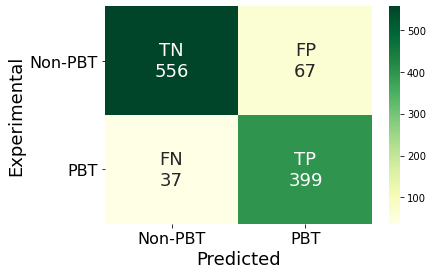

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_true = filtered_singletons['PBT_label']
y_pred = filt_singletons_DLpred['PBT_bin_pred']


cm = confusion_matrix(y_true, y_pred)

# Plot using seaborn
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn', annot_kws={"size": 16},
            cbar_kws={'shrink': 1, 'orientation': 'vertical'}, ax=ax)

# Define custom labels for the axes
tick_labels = ['Non-PBT', 'PBT']
# Setting the tick labels on both axes
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)

# Rotate the tick labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Annotate each cell with the respective quadrant label
quadrant_labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        text = ax.texts[i*2+j]
        text.set_text(f'{quadrant_labels[i][j]}\n{text.get_text()}')
        text.set_fontsize(18)  # Increase font size of quadrant labels

# Setting the labels and title
ax.set_xlabel('Predicted', fontsize=18)
ax.set_ylabel('Experimental', fontsize=18)
ax.set_xticklabels(tick_labels, fontsize=16)
ax.set_yticklabels(tick_labels, fontsize=16)
#plt.savefig('images/Fig4_Gen25_DLpred1059.png', dpi=600, bbox_inches='tight')

plt.show()


In [95]:
accuracy = accuracy_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred) 

# Specificity
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.90
Sensitivity (Recall): 0.92
Specificity: 0.89


Here we developed a Python script to calculate the **PBT function according to the original GP-QSPR equation developed by Papa and Gramatica using experimental data for P, B and T**

## GP-QSPR

### **Defining GP-QSPR PBT function with RDkit**

In [97]:
from GP_QSPR import GetPrincipleQuantumNumber, EStateAll, MaxISDiff, CountMultipleBonds, CalcPBT

In [99]:
filtered_singletons['mol'] = filtered_singletons['standardized_smiles'].apply(Chem.MolFromSmiles)
filtered_singletons

/common/users/devan/anaconda3/envs/main_DE/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,standardized_smiles,PBT_label,mol
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,1,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cba9ab0>
1,C=C(F)C(=O)OC,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cba9bd0>
2,S=c1[nH]c2ccccc2s1,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cba9b70>
3,O=S(=O)(O)C(F)(F)F,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cba9c30>
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cba9c90>
...,...,...,...
1060,NCCCN1CCN(CCCN)CC1,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cb4fc90>
1061,CC(=O)NNC(C)=O,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cb4fcf0>
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cb4fd50>
1063,C=CC(=O)NCNC(=O)C=C,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cb4fdb0>


In [100]:
from GP_QSPR import CalcPBT

QSPR_PBT_test = [CalcPBT(molz) for molz in filtered_singletons['mol']]

In [101]:
filtered_singletons[['xN', 'HBD', 'nBM', 'MAXDP', 'PBT_QSPR']] = filtered_singletons['mol'].apply(CalcPBT).apply(pd.Series)

/common/users/devan/anaconda3/envs/main_DE/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [102]:
filtered_singletons

,standardized_smiles,PBT_label,mol,xN,HBD,nBM,MAXDP,PBT_QSPR
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,1,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cba9ab0>,0.0,0.0,0.0,4.358333,-1.770217
1,C=C(F)C(=O)OC,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cba9bd0>,1.0,0.0,2.0,3.426343,-0.632433
2,S=c1[nH]c2ccccc2s1,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cba9b70>,0.0,1.0,11.0,1.309259,0.448826
3,O=S(=O)(O)C(F)(F)F,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cba9c30>,3.0,1.0,2.0,2.724537,0.301079
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cba9c90>,2.0,1.0,12.0,5.195194,1.707898
...,...,...,...,...,...,...,...,...
1060,NCCCN1CCN(CCCN)CC1,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cb4fc90>,0.0,4.0,0.0,1.487733,-3.152239
1061,CC(=O)NNC(C)=O,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cb4fcf0>,0.0,2.0,2.0,3.022361,-2.027386
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cb4fd50>,0.0,0.0,14.0,1.803607,1.468176
1063,C=CC(=O)NCNC(=O)C=C,0,<rdkit.Chem.rdchem.Mol object at 0x7f3f6cb4fdb0>,0.0,2.0,4.0,3.475328,-1.615470


In [104]:
filtered_singletons_QSPR = filtered_singletons[['standardized_smiles', 'PBT_label', 'PBT_QSPR']].copy()
filtered_singletons_QSPR

,standardized_smiles,PBT_label,PBT_QSPR
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,1,-1.770217
1,C=C(F)C(=O)OC,0,-0.632433
2,S=c1[nH]c2ccccc2s1,0,0.448826
3,O=S(=O)(O)C(F)(F)F,0,0.301079
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,1,1.707898
...,...,...,...
1060,NCCCN1CCN(CCCN)CC1,0,-3.152239
1061,CC(=O)NNC(C)=O,0,-2.027386
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0,1.468176
1063,C=CC(=O)NCNC(=O)C=C,0,-1.615470


### Binary classification for GP-QSPR prediction

In [105]:
threshold = 1.5
filtered_singletons_QSPR['PBT_QSPR']= np.where(filtered_singletons_QSPR['PBT_QSPR'] > threshold, 1, 0)

In [106]:
filtered_singletons_QSPR

,standardized_smiles,PBT_label,PBT_QSPR
0,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,1,0
1,C=C(F)C(=O)OC,0,0
2,S=c1[nH]c2ccccc2s1,0,0
3,O=S(=O)(O)C(F)(F)F,0,0
4,COC1(c2ccc(F)cc2)CCC(NCCCOc2ccc(F)cc2)CC1,1,1
...,...,...,...
1060,NCCCN1CCN(CCCN)CC1,0,0
1061,CC(=O)NNC(C)=O,0,0
1062,CN(C(=S)SSC(=S)N(C)c1ccccc1)c1ccccc1,0,0
1063,C=CC(=O)NCNC(=O)C=C,0,0


### Confusion Matrix for GP-QSPR prediction

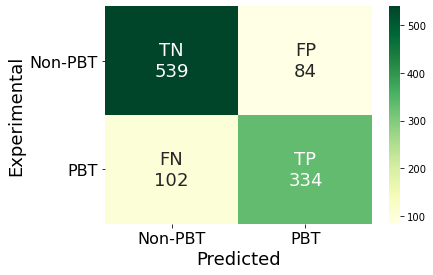

In [107]:
y_true = filtered_singletons_QSPR['PBT_label']
y_pred = filtered_singletons_QSPR['PBT_QSPR']

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using seaborn
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn', annot_kws={"size": 16},
            cbar_kws={'shrink': 1, 'orientation': 'vertical'}, ax=ax)

# Define custom labels for the axes
tick_labels = ['Non-PBT', 'PBT']
# Setting the tick labels on both axes
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)

# Rotate the tick labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


# Annotate each cell with the respective quadrant label
quadrant_labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        text = ax.texts[i*2+j]
        text.set_text(f'{quadrant_labels[i][j]}\n{text.get_text()}')
        text.set_fontsize(18)


        # Setting the labels and title
ax.set_xlabel('Predicted', fontsize=18)
ax.set_ylabel('Experimental', fontsize=18)
ax.set_xticklabels(tick_labels, fontsize=16)
ax.set_yticklabels(tick_labels, fontsize=16)

plt.savefig('images/FIg4_Gen25_QSARpred_1059.png', dpi=600, bbox_inches='tight')

plt.show()


In [108]:
accuracy = accuracy_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred) 

# Specificity
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Sensitivity (Recall): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.82
Sensitivity (Recall): 0.77
Specificity: 0.87


## Application to Pharmaceuticals

In this section, we analyze a dataset of 559 pharmaceuticals, originally extracted from the DrugBank database. Each compound in this dataset has been consistently classified as PBT (Persistent, Bioaccumulative, and Toxic) or non-PBT according to two distinct QSPR (Quantitative Structure-Property Relationship) models. 

The dataset was preprocessed using the standardized procedure described above (**Filtering and Pre-Processing Procedure**) to ensure consistency across all analyses.

The applicability domain analysis showed all compounds falling within the threshold when using Morgan fingerprints. The RDKit descriptor analysis identified 12 compounds (2.1%) outside the applicability domain After removing these compounds, the consensus classification from the QSPR models was compared with our model's predictions for the remaining 547 pharmaceuticals 



### **Figure 6: QSAR vs Deep Learning in Pharmacueticals**
Comparison of QSPR and DL-based model prediction on a dataset of 547 pharmaceuticals within the applicability domain. The confusion matrix shows 410 cases where both models agree on non-PBT, 123 cases where QSPR predicts as non-PBT but our model as PBT, 2 cases where QSPR predicts as PBT but our model as non-PBT and 12 cases where both models agree on PBT. The color scale from light yellow to dark green indicates increasing number of compounds in the corresponding quadrant of the confusion matrix.

In [109]:
pharma = pd.read_csv('Datasets/Pharmaceuticals_559_QSPR_PBT.csv')
pharma

,CAS,DB_name,DB_smiles,QSAR_consensus
0,000071-00-1,Histidine,N[C@@H](Cc1c[nH]cn1)C(=O)O,0
1,000063-91-2,Phenylalanine,N[C@@H](Cc1ccccc1)C(=O)O,0
2,000058-85-5,Biotin,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21,0
3,000056-87-1,Lysine,NCCCC[C@@H](N)C(=O)O,0
4,000071-44-3,Spermine,NCCCNCCCCNCCCN,0
...,...,...,...,...
554,013674-05-0,"Phenethylamine, 3-methoxy-α-methyl-4,5-(methyl...",COc1cc(CC(C)N)cc2c1OCO2,0
555,014838-15-4,"Norephedrine, (.+/-.)-",CC(N)C(O)c1ccccc1,0
556,015588-95-1,"Benzeneethanamine, 2,5-dimethoxy-α,4-dimethyl-",COc1cc(CC(C)N)c(OC)cc1C,0
557,042542-10-9,"N-Methyl-3,4-methylenedioxyamphetamine",CNC(C)Cc1ccc2c(c1)OCO2,0


In [110]:
out_of_domain_pharma = pd.read_csv('Datasets/rdkit_drugs_out_of_domain.csv')
out_of_domain_pharma

,CAS,DB_name,DB_smiles,QSAR_consensus
0,000114-07-8,Erythromycin,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,0
1,066085-59-4,Nimodipine,COCCOC(=O)C1=C(C)NC(C)=C(C(=O)OC(C)C)C1c1cccc(...,0
2,000091-33-8,Benzthiazide,NS(=O)(=O)c1cc2c(cc1Cl)N=C(CSCc1ccccc1)NS2(=O)=O,0
3,000059-05-2,Methotrexate,CN(Cc1cnc2nc(=N)[nH]c(N)c2n1)c1ccc(C(=O)N[C@@H...,0
4,000113-15-5,Ergotamine,CN1C[C@H](C(=O)N[C@]2(C)O[C@@]3(O)[C@@H]4CCCN4...,0
5,000058-32-2,Dipyridamole,OCCN(CCO)c1nc(N2CCCCC2)c2nc(N(CCO)CCO)nc(N3CCC...,0
6,039562-70-4,Nitrendipine,CCOC(=O)C1=C(C)NC(C)=C(C(=O)OC)C1c1cccc([N+](=...,0
7,000071-63-6,Digitoxin,C[C@H]1O[C@@H](O[C@H]2[C@@H](O)C[C@H](O[C@H]3[...,0
8,000059-30-3,Folic Acid,n1c2C(=O)NC(N)=Nc2ncc1CNc3ccc(cc3)C(=O)N[C@H](...,0
9,000061-19-8,adenosine phosphate,Nc1ncnc2c1ncn2[C@H]1O[C@@H](COP(=O)(O)O)[C@H](...,0


In [111]:
filtered_pharma = pharma[~pharma['DB_smiles'].isin(out_of_domain_pharma['DB_smiles'])]
filtered_pharma

,CAS,DB_name,DB_smiles,QSAR_consensus
0,000071-00-1,Histidine,N[C@@H](Cc1c[nH]cn1)C(=O)O,0
1,000063-91-2,Phenylalanine,N[C@@H](Cc1ccccc1)C(=O)O,0
2,000058-85-5,Biotin,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21,0
3,000056-87-1,Lysine,NCCCC[C@@H](N)C(=O)O,0
4,000071-44-3,Spermine,NCCCNCCCCNCCCN,0
...,...,...,...,...
554,013674-05-0,"Phenethylamine, 3-methoxy-α-methyl-4,5-(methyl...",COc1cc(CC(C)N)cc2c1OCO2,0
555,014838-15-4,"Norephedrine, (.+/-.)-",CC(N)C(O)c1ccccc1,0
556,015588-95-1,"Benzeneethanamine, 2,5-dimethoxy-α,4-dimethyl-",COc1cc(CC(C)N)c(OC)cc1C,0
557,042542-10-9,"N-Methyl-3,4-methylenedioxyamphetamine",CNC(C)Cc1ccc2c(c1)OCO2,0


In [112]:
filtered_pharma['DB_smiles'].to_csv('Datasets/filtered_pharma_smi.csv', index=False)

We first perform the prediction using our proposed model on the dataset of pharmaceuticals and then we will compare our model prediction to the QSPR consensus prediction

#### DL-based model prediction on pharmaceuticals

To run the model predicting using `chemprop` in a Bash environment:

Open a new bash shell and execute the following commands:

1. **Activate the Conda Environment**  
   First, make sure to activate the `chemprop_DE` Conda environment to access the required dependencies:
   
   ```bash
   conda activate chemprop_DE
   ```

2. Run the **Prediction Command**
```bash
chemprop_predict --test_path Datasets/filtered_pharma_smi.csv \
                 --features_generator rdkit_2d_normalized \
                 --no_features_scaling \
                 --checkpoint_dir 0fold_outputs/CC_results_nok/fold_0/ \
                 --preds_path Datasets/filtered_pharma_prediction_DL.csv
```

3. after completing the **Prediction command** in bash returns to this notebook

In [114]:
filtered_pharma_smi = pd.read_csv('Datasets/filtered_pharma_smi.csv')
filtered_pharma_smi

,DB_smiles
0,N[C@@H](Cc1c[nH]cn1)C(=O)O
1,N[C@@H](Cc1ccccc1)C(=O)O
2,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21
3,NCCCC[C@@H](N)C(=O)O
4,NCCCNCCCCNCCCN
...,...
542,COc1cc(CC(C)N)cc2c1OCO2
543,CC(N)C(O)c1ccccc1
544,COc1cc(CC(C)N)c(OC)cc1C
545,CNC(C)Cc1ccc2c(c1)OCO2


In [115]:
filtered_pharma_predicted =pd.read_csv('Datasets/filtered_pharma_prediction_DL.csv')
filtered_pharma_predicted

,DB_smiles,PBT_label
0,N[C@@H](Cc1c[nH]cn1)C(=O)O,0.000045
1,N[C@@H](Cc1ccccc1)C(=O)O,0.000155
2,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21,0.000324
3,NCCCC[C@@H](N)C(=O)O,0.000015
4,NCCCNCCCCNCCCN,0.000118
...,...,...
542,COc1cc(CC(C)N)cc2c1OCO2,0.004641
543,CC(N)C(O)c1ccccc1,0.000931
544,COc1cc(CC(C)N)c(OC)cc1C,0.027564
545,CNC(C)Cc1ccc2c(c1)OCO2,0.006475


In [116]:
# Perform the merge
filtered_prediction_pharmadf = pd.merge(filtered_pharma_predicted, filtered_pharma, on='DB_smiles', how='left') 
filtered_prediction_pharmadf

,DB_smiles,PBT_label,CAS,DB_name,QSAR_consensus
0,N[C@@H](Cc1c[nH]cn1)C(=O)O,0.000045,000071-00-1,Histidine,0
1,N[C@@H](Cc1ccccc1)C(=O)O,0.000155,000063-91-2,Phenylalanine,0
2,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21,0.000324,000058-85-5,Biotin,0
3,NCCCC[C@@H](N)C(=O)O,0.000015,000056-87-1,Lysine,0
4,NCCCNCCCCNCCCN,0.000118,000071-44-3,Spermine,0
...,...,...,...,...,...
542,COc1cc(CC(C)N)cc2c1OCO2,0.004641,013674-05-0,"Phenethylamine, 3-methoxy-α-methyl-4,5-(methyl...",0
543,CC(N)C(O)c1ccccc1,0.000931,014838-15-4,"Norephedrine, (.+/-.)-",0
544,COc1cc(CC(C)N)c(OC)cc1C,0.027564,015588-95-1,"Benzeneethanamine, 2,5-dimethoxy-α,4-dimethyl-",0
545,CNC(C)Cc1ccc2c(c1)OCO2,0.006475,042542-10-9,"N-Methyl-3,4-methylenedioxyamphetamine",0


In [117]:
filtered_prediction_pharmadf['PBT_DL_bin_pred'] = (filtered_prediction_pharmadf['PBT_label'] > 0.38).astype(int)
filtered_prediction_pharmadf

,DB_smiles,PBT_label,CAS,DB_name,QSAR_consensus,PBT_DL_bin_pred
0,N[C@@H](Cc1c[nH]cn1)C(=O)O,0.000045,000071-00-1,Histidine,0,0
1,N[C@@H](Cc1ccccc1)C(=O)O,0.000155,000063-91-2,Phenylalanine,0,0
2,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21,0.000324,000058-85-5,Biotin,0,0
3,NCCCC[C@@H](N)C(=O)O,0.000015,000056-87-1,Lysine,0,0
4,NCCCNCCCCNCCCN,0.000118,000071-44-3,Spermine,0,0
...,...,...,...,...,...,...
542,COc1cc(CC(C)N)cc2c1OCO2,0.004641,013674-05-0,"Phenethylamine, 3-methoxy-α-methyl-4,5-(methyl...",0,0
543,CC(N)C(O)c1ccccc1,0.000931,014838-15-4,"Norephedrine, (.+/-.)-",0,0
544,COc1cc(CC(C)N)c(OC)cc1C,0.027564,015588-95-1,"Benzeneethanamine, 2,5-dimethoxy-α,4-dimethyl-",0,0
545,CNC(C)Cc1ccc2c(c1)OCO2,0.006475,042542-10-9,"N-Methyl-3,4-methylenedioxyamphetamine",0,0


In [119]:
filtered_prediction_pharmadf.to_csv('Datasets/prediction_pharma_inAD.csv', index=False)

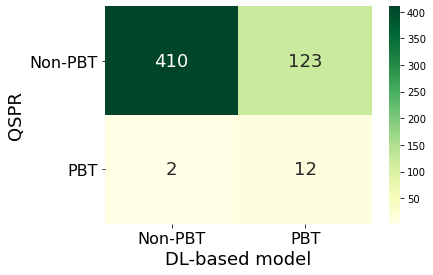

In [120]:
y_true = filtered_prediction_pharmadf['QSAR_consensus']
y_pred = filtered_prediction_pharmadf['PBT_DL_bin_pred']

cm = confusion_matrix(y_true, y_pred)

# Plot using seaborn
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn', annot_kws={"size": 18},
            cbar_kws={'shrink': 1, 'orientation': 'vertical'}, ax=ax)

# Define custom labels for the axes
tick_labels = ['Non-PBT', 'PBT']

# Setting the tick labels on both axes
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)

# Rotate the tick labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Setting the labels and title
ax.set_xlabel('DL-based model', fontsize=18)
ax.set_ylabel('QSPR', fontsize=18)
ax.set_xticklabels(tick_labels, fontsize=16)
ax.set_yticklabels(tick_labels, fontsize=16)
#plt.savefig('images/Fig6_Gen25_pharma_547.png', dpi=600, bbox_inches='tight')

plt.show()

In [121]:
# True Positives are where both y_true and y_pred are 1 
TP_filter = (filtered_prediction_pharmadf['QSAR_consensus'] == 1) & (filtered_prediction_pharmadf['PBT_DL_bin_pred'] == 1)

# Filter the DataFrame to get only TP cases
TP_cases = filtered_prediction_pharmadf[TP_filter]
TP_cases

,DB_smiles,PBT_label,CAS,DB_name,QSAR_consensus,PBT_DL_bin_pred
73,CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21,0.947178,000050-53-3,Chlorpromazine,1,1
85,Cc1cccc(N(C)C(=S)Oc2ccc3ccccc3c2)c1,0.500709,002398-96-1,Tolnaftate,1,1
95,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,0.640789,000298-57-7,Cinnarizine,1,1
136,Oc1c(Cl)cc(Cl)c(Cl)c1Cc1c(O)c(Cl)cc(Cl)c1Cl,0.987741,000070-30-4,Hexachlorophene,1,1
155,CN(C)C(=O)C(CCN1CCC(O)(c2ccc(Cl)cc2)CC1)(c1ccc...,0.992947,053179-11-6,Loperamide,1,1
203,CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21,0.926327,079617-96-2,Sertraline,1,1
226,CN(C)CC/C=C1/c2ccccc2Sc2ccc(Cl)cc21,0.899995,000113-59-7,Chlorprothixene,1,1
228,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,0.957364,000303-49-1,Clomipramine,1,1
298,Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O,0.830047,000097-18-7,Bithionol,1,1
309,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,0.962296,052468-60-7,Flunarizine,1,1


In [122]:
len(TP_cases)

12

In [123]:
FP_filter = (filtered_prediction_pharmadf['QSAR_consensus'] == 0) & (filtered_prediction_pharmadf['PBT_DL_bin_pred'] == 1)

FP_cases = filtered_prediction_pharmadf[FP_filter]
FP_cases

,DB_smiles,PBT_label,CAS,DB_name,QSAR_consensus,PBT_DL_bin_pred
10,C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@]2(C)[C@@H]([C...,0.850233,000050-14-6,Ergocalciferol,0,1
14,C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@]2(C)[C@@H]([C...,0.804342,000067-97-0,Cholecalciferol,0,1
36,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H...,0.471210,000057-27-2,Morphine,0,1
38,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,0.798130,000076-57-3,Codeine,0,1
39,CN(C)CCC=C1c2ccccc2CCc2ccccc21,0.556854,000050-48-6,Amitriptyline,0,1
...,...,...,...,...,...,...
527,CC12CC[C@H](O)C[C@H]1CCC1C2CCC2(C)C1CC[C@H]2O,0.865204,001852-53-5,"Androstane-3,17-diol, (3α,5α,17β)-",0,1
529,CCC(=O)c1ccc2c(c1)N(CCCN1CCN(CCO)CC1)c1ccccc1S2,0.913128,002622-30-2,Carfenazine,0,1
537,CC(C)N(CCC(C(=O)N)(c1ccccc1)c1ccccc1)C(C)C,0.392296,007492-32-2,"Benzenepropanaminium, γ-(aminocarbonyl)-N-meth...",0,1
540,CC(N)C12CC3CC(CC(C3)C1)C2,0.493017,013392-28-4,"1-Adamantanemethylamine, α-methyl-",0,1


In [124]:
FN_filter = (filtered_prediction_pharmadf['QSAR_consensus'] == 1) & (filtered_prediction_pharmadf['PBT_DL_bin_pred'] == 0)

FN_cases = filtered_prediction_pharmadf[FN_filter]
FN_cases

,DB_smiles,PBT_label,CAS,DB_name,QSAR_consensus,PBT_DL_bin_pred
303,CC(Cc1ccccc1)NCCC(c1ccccc1)c1ccccc1,0.303312,000390-64-7,Prenylamine,1,0
546,OC(=NCC1CCCCN1)c1cc(OCC(F)(F)F)ccc1OCC(F)(F)F,0.170043,054143-55-4,"Benzamide, N-(2-piperidinylmethyl)-2,5-bis(2,2...",1,0


In [125]:
TN_filter = (filtered_prediction_pharmadf['QSAR_consensus'] == 0) & (filtered_prediction_pharmadf['PBT_DL_bin_pred'] == 0)

TN_cases = filtered_prediction_pharmadf[TN_filter]
TN_cases

,DB_smiles,PBT_label,CAS,DB_name,QSAR_consensus,PBT_DL_bin_pred
0,N[C@@H](Cc1c[nH]cn1)C(=O)O,0.000045,000071-00-1,Histidine,0,0
1,N[C@@H](Cc1ccccc1)C(=O)O,0.000155,000063-91-2,Phenylalanine,0,0
2,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@@H]21,0.000324,000058-85-5,Biotin,0,0
3,NCCCC[C@@H](N)C(=O)O,0.000015,000056-87-1,Lysine,0,0
4,NCCCNCCCCNCCCN,0.000118,000071-44-3,Spermine,0,0
...,...,...,...,...,...,...
539,CC(C)NCC(O)c1ccc(O)c(O)c1,0.000399,007683-59-2,Isoproterenol,0,0
542,COc1cc(CC(C)N)cc2c1OCO2,0.004641,013674-05-0,"Phenethylamine, 3-methoxy-α-methyl-4,5-(methyl...",0,0
543,CC(N)C(O)c1ccccc1,0.000931,014838-15-4,"Norephedrine, (.+/-.)-",0,0
544,COc1cc(CC(C)N)c(OC)cc1C,0.027564,015588-95-1,"Benzeneethanamine, 2,5-dimethoxy-α,4-dimethyl-",0,0


For comparison, **a distinct dataset taken from a study by Howard and Miur was considered. This dataset encompassed 272 chemicals detected in actual environmental media.**

### **Howard and Miur molecules detectd in environmental media**

In [127]:
HM_mol = pd.read_csv('Datasets/pharma_environment.csv', sep =';')
HM_mol

,ID,Molstructure
0,000050-78-2,Acetylsalicylic Acid
1,000051-21-8,Fluorouracil
2,000051-48-9,Synthroid (Thyroxine)
3,000052-53-9,Verapamil SR
4,000052-86-8,Haloperidol
...,...,...
267,000050-33-9,Phenylbutazone
268,000050-36-2,Cocaine
269,000050-48-6,Amitriptyline
270,000050-49-7,Imipramine


#### Molecules TP cases that are in common with molecules detected in environmental media as P, B or T

In [128]:
TP_cases

,DB_smiles,PBT_label,CAS,DB_name,QSAR_consensus,PBT_DL_bin_pred
73,CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21,0.947178,000050-53-3,Chlorpromazine,1,1
85,Cc1cccc(N(C)C(=S)Oc2ccc3ccccc3c2)c1,0.500709,002398-96-1,Tolnaftate,1,1
95,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,0.640789,000298-57-7,Cinnarizine,1,1
136,Oc1c(Cl)cc(Cl)c(Cl)c1Cc1c(O)c(Cl)cc(Cl)c1Cl,0.987741,000070-30-4,Hexachlorophene,1,1
155,CN(C)C(=O)C(CCN1CCC(O)(c2ccc(Cl)cc2)CC1)(c1ccc...,0.992947,053179-11-6,Loperamide,1,1
203,CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21,0.926327,079617-96-2,Sertraline,1,1
226,CN(C)CC/C=C1/c2ccccc2Sc2ccc(Cl)cc21,0.899995,000113-59-7,Chlorprothixene,1,1
228,CN(C)CCCN1c2ccccc2CCc2ccc(Cl)cc21,0.957364,000303-49-1,Clomipramine,1,1
298,Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O,0.830047,000097-18-7,Bithionol,1,1
309,Fc1ccc(C(c2ccc(F)cc2)N2CCN(C/C=C/c3ccccc3)CC2)cc1,0.962296,052468-60-7,Flunarizine,1,1


In [129]:
# Common molecules between TP and Howard and Miur dataset
common_elements_TP = TP_cases['DB_name'].isin(HM_mol['Molstructure'])

filtered_TP = TP_cases[common_elements_TP]
filtered_TP

,DB_smiles,PBT_label,CAS,DB_name,QSAR_consensus,PBT_DL_bin_pred
95,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1,0.640789,000298-57-7,Cinnarizine,1,1
203,CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21,0.926327,079617-96-2,Sertraline,1,1


#### Molecules FP cases that are in common with molecules detected in environmental media as P, B or T

In [130]:
# Common mols between FP and Howard and Miur
common_elements_FP = FP_cases['DB_name'].isin(HM_mol['Molstructure'])

filtered_FP = FP_cases[common_elements_FP]
filtered_FP

,DB_smiles,PBT_label,CAS,DB_name,QSAR_consensus,PBT_DL_bin_pred
36,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H...,0.471210,000057-27-2,Morphine,0,1
38,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,0.798130,000076-57-3,Codeine,0,1
39,CN(C)CCC=C1c2ccccc2CCc2ccccc21,0.556854,000050-48-6,Amitriptyline,0,1
41,CCC(=O)C(CC(C)N(C)C)(c1ccccc1)c1ccccc1,0.507468,000076-99-3,Methadone,0,1
69,CN(C)CCCN1c2ccccc2CCc2ccccc21,0.763038,000050-49-7,Imipramine,0,1
77,COc1ccc2c3c1O[C@H]1C(=O)CC[C@@]4(O)[C@@H](C2)N...,0.887851,000076-42-6,Oxycodone,0,1
111,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,0.672074,000058-22-0,Testosterone,0,1
142,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,0.519042,000050-28-2,Estradiol,0,1
150,CCC(=O)N(c1ccccc1)C1CCN(CCc2ccccc2)CC1,0.529471,000437-38-7,Fentanyl,0,1
179,COc1ccc2c3c1O[C@H]1C(=O)CC[C@H]4[C@@H](C2)N(C)...,0.881886,000125-29-1,Hydrocodone,0,1


In [131]:
len(filtered_FP)

15

#### Molecules TN cases that are in common with molecules detected in environmental media as P, B or T

In [132]:
# Common mols between TN and Howard and Miur data
common_elements_TN = TN_cases['DB_name'].isin(HM_mol['Molstructure'])

filtered_TN = TN_cases[common_elements_TN]
filtered_TN

,DB_smiles,PBT_label,CAS,DB_name,QSAR_consensus,PBT_DL_bin_pred
18,COCCCC/C(=N\OCCN)c1ccc(C(F)(F)F)cc1,0.024780,054739-18-3,Fluvoxamine,0,0
23,COc1cccc(C2(O)CCCCC2CN(C)C)c1,0.087617,027203-92-5,Tramadol,0,0
25,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C)C=C2C=C[C@H](C...,0.104629,075330-75-5,Lovastatin,0,0
29,Cc1noc(NS(=O)(=O)c2ccc(N)cc2)c1C,0.001842,000127-69-5,Sulfisoxazole,0,0
30,CC=CC(=O)N(CC)c1ccccc1C,0.014243,000483-63-6,Crotamiton,0,0
33,COc1ccc(C(CN(C)C)C2(O)CCCCC2)cc1,0.156673,093413-69-5,Venlafaxine,0,0
67,O=C(N[C@H](CO)[C@H](O)c1ccc([N+](=O)[O-])cc1)C...,0.006911,000056-75-7,Chloramphenicol,0,0
80,CN/C(=N/C#N)NCCSCc1nc[nH]c1C,0.001009,051481-61-9,Cimetidine,0,0
86,O=P1(N(CCCl)CCCl)NCCCO1,0.023290,000050-18-0,Cyclophosphamide,0,0
87,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,0.165087,085721-33-1,Ciprofloxacin,0,0


In [133]:
len(filtered_TN)

55